In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential

In [29]:
X ,y = make_moons(n_samples=1000, noise=0.1,random_state=42)

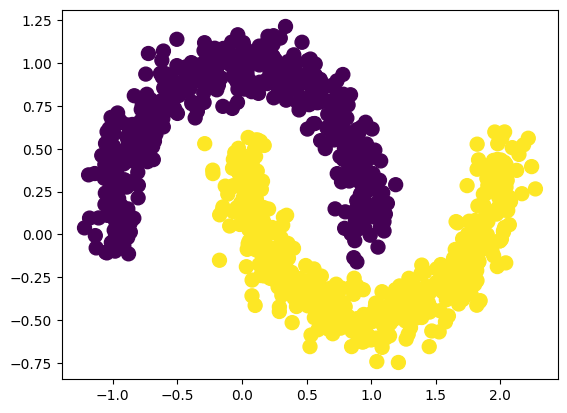

In [30]:
plt.scatter(X[:,0],X[:,1],c=y,s=100)
plt.show()

In [88]:
model = Sequential()
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [89]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [95]:
oldweight=model.get_weights()[0]

In [96]:
model.fit(X_train,y_train,epochs=100,verbose=1)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8737 - loss: 0.2916 
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8617 - loss: 0.3162 
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8762 - loss: 0.2782  
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8739 - loss: 0.2884  
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8738 - loss: 0.2785 
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8813 - loss: 0.2901 
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8472 - loss: 0.3101  
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8787 - loss: 0.2724 
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8627 - loss: 0.3065 
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8749 - loss: 0.2784 
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8635 - loss: 0.2968 
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/st

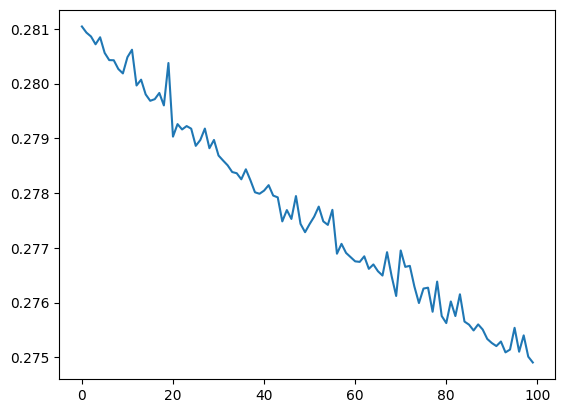

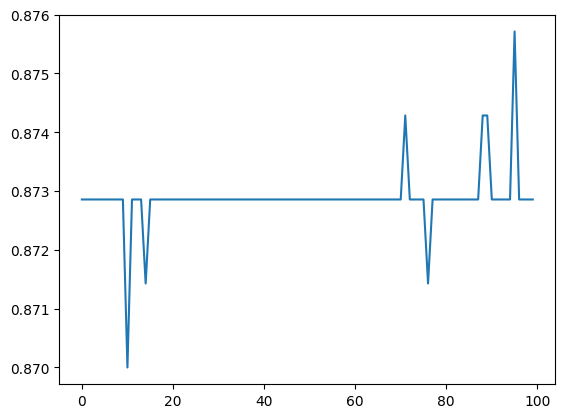

In [43]:
plt.plot(model.history.history['loss'])
plt.show()
plt.plot(model.history.history['accuracy'])

In [44]:
model.evaluate(X_test,y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8816 - loss: 0.2369 


[0.23397740721702576, 0.8899999856948853]

In [97]:
model.get_weights()[0]

array([[-0.374047  , -0.4152491 ,  0.39403856,  0.11335582, -0.00272844,
        -0.31291562,  0.41889822,  0.43261632,  0.33237106,  0.42600277],
       [ 0.5727103 ,  0.85575336, -1.0362896 , -1.1235485 , -0.9865898 ,
         0.8787075 , -1.1668146 , -1.057925  , -0.7661478 , -0.8502385 ]],
      dtype=float32)

In [46]:
model.optimizer.get_config()

{'name': 'adam',
 'learning_rate': 0.0010000000474974513,
 'weight_decay': None,
 'clipnorm': None,
 'global_clipnorm': None,
 'clipvalue': None,
 'use_ema': False,
 'ema_momentum': 0.99,
 'ema_overwrite_frequency': None,
 'loss_scale_factor': None,
 'gradient_accumulation_steps': None,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [1]:
new_weight = model.get_weights()[0] 
gradient = ( oldweight - new_weight) / 0.001
percent_change = (abs(100*(oldweight - new_weight)/oldweight))

NameError: name 'model' is not defined

In [99]:
gradient

array([[-283.59152  , -246.78575  ,  105.25101  ,   -7.8537984,
         -15.542155 ,   -7.981896 ,  114.96931  ,  212.16628  ,
          80.57004  ,  296.16708  ],
       [-193.67426  ,   38.576004 , -260.90012  , -386.08633  ,
        -203.91571  ,  156.51535  , -408.9397   , -173.24995  ,
          59.20094  ,   10.544299 ]], dtype=float32)

In [100]:
percent_change

array([[43.122707 , 37.27685  , 21.080154 ,  7.4442163, 85.06649  ,
         2.4873662, 21.535175 , 32.905087 , 19.511267 , 41.010727 ],
       [51.096535 ,  4.3134003, 20.11272  , 25.574818 , 17.128498 ,
        15.119001 , 25.951998 , 14.071921 ,  8.374172 ,  1.255731 ]],
      dtype=float32)

In [104]:
oldweight  

array([[-0.65763855, -0.66203487,  0.49928957,  0.10550202, -0.0182706 ,
        -0.32089752,  0.53386754,  0.6447826 ,  0.4129411 ,  0.7221699 ],
       [ 0.379036  ,  0.89432937, -1.2971897 , -1.5096349 , -1.1905055 ,
         1.0352229 , -1.5757543 , -1.231175  , -0.70694685, -0.8396942 ]],
      dtype=float32)

In [105]:
new_weight

array([[-0.374047  , -0.4152491 ,  0.39403856,  0.11335582, -0.00272844,
        -0.31291562,  0.41889822,  0.43261632,  0.33237106,  0.42600277],
       [ 0.5727103 ,  0.85575336, -1.0362896 , -1.1235485 , -0.9865898 ,
         0.8787075 , -1.1668146 , -1.057925  , -0.7661478 , -0.8502385 ]],
      dtype=float32)

In [ ]:
model = Sequential()

model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# 

In [83]:
oldweight = model.get_weights()[0]

In [82]:
model.fit(X_train,y_train,epochs=50,verbose=1)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9686 - loss: 0.0978 
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9685 - loss: 0.0970 
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9737 - loss: 0.0864 
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9713 - loss: 0.1000  
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9713 - loss: 0.0980 
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9584 - loss: 0.1076 
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9618 - loss: 0.1056 
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9821 - loss: 0.0791 
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9766 - loss: 0.0880
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9684 - loss: 0.0915  
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9740 - loss: 0.0896 
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy:

In [77]:
new_weight = model.get_weights()[0]
model.optimizer.get_config()

{'name': 'adam',
 'learning_rate': 0.0010000000474974513,
 'weight_decay': None,
 'clipnorm': None,
 'global_clipnorm': None,
 'clipvalue': None,
 'use_ema': False,
 'ema_momentum': 0.99,
 'ema_overwrite_frequency': None,
 'loss_scale_factor': None,
 'gradient_accumulation_steps': None,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [84]:
gradient = ( oldweight - new_weight) / 0.001 
percent_change = (abs(100*(oldweight - new_weight)/oldweight))
gradient

array([[ -44.526573,  -45.35991 ,  -46.833633,  -44.73674 ,   43.296932,
         -46.183464,  140.2688  ,  646.2774  ,   45.140026,   47.65695 ],
       [ -55.613335,  -47.65108 ,  -39.84925 ,  -50.336983,   41.896072,
         -42.572823, -195.34384 ,   77.703354,   33.107487,   16.6921  ]],
      dtype=float32)

In [85]:
percent_change

array([[  6.529084 ,   6.5821424,   6.635393 ,   6.5367703,   6.09014  ,
          6.8324847,  20.652649 ,  10.964384 ,   6.3727503,   6.549709 ],
       [ 14.649486 ,  12.802704 ,  10.941078 ,  13.561799 ,  11.830251 ,
         11.748534 , 255.0547   ,   6.822906 ,   9.497893 ,   4.887994 ]],
      dtype=float32)

In [86]:
new_weight

array([[-0.6374462 , -0.643776  , -0.65898186, -0.6396493 ,  0.667638  ,
        -0.6297561 ,  0.5389119 ,  5.248057  ,  0.6631888 ,  0.6799625 ],
       [ 0.43523988,  0.41984653,  0.40406612,  0.42150444, -0.39603966,
         0.40493998,  0.11875486,  1.0611567 , -0.3816847 , -0.35818398]],
      dtype=float32)

In [87]:
oldweight

array([[-0.6819728 , -0.6891359 , -0.7058155 , -0.684386  ,  0.71093494,
        -0.67593956,  0.6791807 ,  5.8943343 ,  0.70832884,  0.72761947],
       [ 0.37962654,  0.37219545,  0.36421686,  0.37116745, -0.3541436 ,
         0.36236715, -0.076589  ,  1.1388601 , -0.3485772 , -0.34149188]],
      dtype=float32)

In [107]:
from keras.losses import mean_squared_error

In [110]:
import tensorflow as tf
from keras.losses import mean_squared_error
# Assuming that you have a compiled model
model.compile(optimizer='sgd', loss='mse')

# Get the gradients of the loss with respect to the model's parameters
with tf.GradientTape() as tape:
    y_pred = model(X_train)
    loss = mean_squared_error(y_train, y_pred)

gradients = tape.gradient(loss, model.trainable_variables)

# Print the gradients
for gradient, variable in zip(gradients, model.trainable_variables):
    print(variable.name, "has gradient", tf.reduce_max(gradient))

kernel has gradient tf.Tensor(0.62624955, shape=(), dtype=float32)
bias has gradient tf.Tensor(0.13760477, shape=(), dtype=float32)
kernel has gradient tf.Tensor(0.2520214, shape=(), dtype=float32)
bias has gradient tf.Tensor(0.23001423, shape=(), dtype=float32)
kernel has gradient tf.Tensor(0.35622337, shape=(), dtype=float32)
bias has gradient tf.Tensor(-0.2982101, shape=(), dtype=float32)
